In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [ ]:
# 📌 1. Upload do CSV
print("📤 Faça upload do arquivo CSV de resultados:")
uploaded = files.upload()
csv_path = list(uploaded.keys())[0]

📤 Faça upload do arquivo CSV de resultados:


Saving final_results.csv to final_results (1).csv


In [ ]:
# 📌 2. Leitura e preparação dos dados
df = pd.read_csv(csv_path)

In [ ]:
# Conversão de colunas
for col in ['value', 'time_ms', 'peak_mem_kb']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['value', 'time_ms', 'peak_mem_kb'], inplace=True)

# Cálculo do valor ótimo por instância
opt_df = df.loc[df.groupby('instance')['value'].idxmax()].rename(columns={'value': 'value_opt'})[['instance', 'value_opt']]
df = pd.merge(df, opt_df, on='instance')

# Fator de aproximação
df['approx_ratio'] = df['value_opt'] / (df['value'] + 1e-9)
df['error_pct'] = 100 * (df['value_opt'] - df['value']) / (df['value_opt'] + 1e-9)

# Timeout
TIMEOUT_MS = 30 * 60 * 1000
df['is_timeout'] = df['time_ms'] >= TIMEOUT_MS

# Nome do algoritmo amigável
df['alg_name'] = df.apply(
    lambda row: f"FPTAS (e={row['epsilon']})" if row['algorithm'] == 'fptas' else row['algorithm'],
    axis=1
)

# Separação por algoritmo
df_bnb = df[df['algorithm'] == 'branch_and_bound']
df_2approx = df[df['algorithm'] == 'two_approx']
df_fptas = df[df['algorithm'] == 'fptas']


In [ ]:
# Função auxiliar para salvar e mostrar gráfico
def salvar_e_mostrar(fig, nome):
    fig.savefig(f"{nome}.png", bbox_inches='tight', dpi=150)
    plt.show()

sns.set_theme(style="whitegrid", palette="deep")

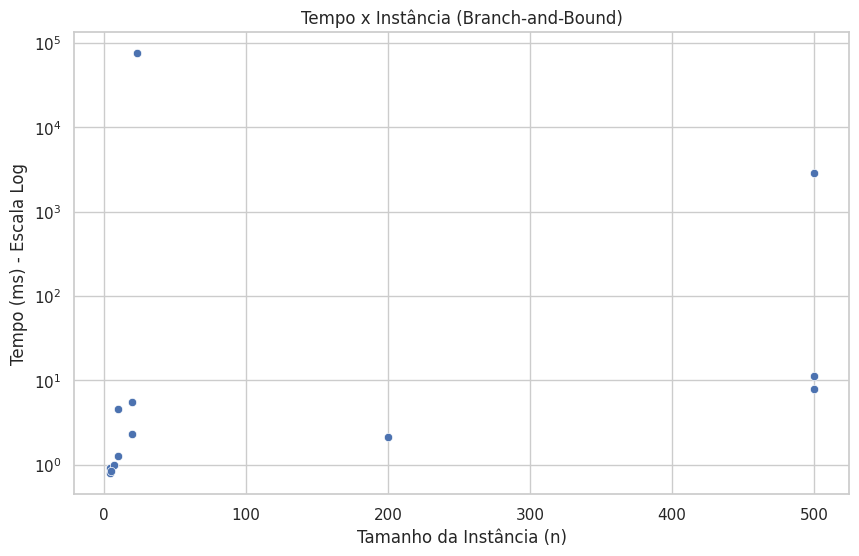

In [ ]:
# --- 1. Tempo vs Instância (BnB) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_bnb, x='n', y='time_ms', ax=ax)
ax.set(yscale='log', title='Tempo x Instância (Branch-and-Bound)', xlabel='Tamanho da Instância (n)', ylabel='Tempo (ms) - Escala Log')
salvar_e_mostrar(fig, "tempo_vs_instancia_bnb")

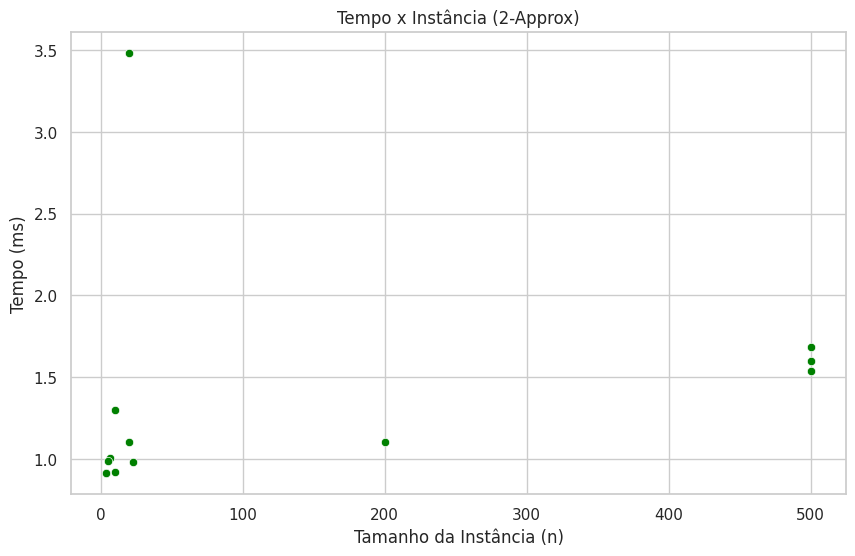

In [ ]:
# --- 2. Tempo vs Instância (2-Approx) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_2approx, x='n', y='time_ms', color='green', ax=ax)
ax.set(title='Tempo x Instância (2-Approx)', xlabel='Tamanho da Instância (n)', ylabel='Tempo (ms)')
salvar_e_mostrar(fig, "tempo_vs_instancia_2approx")

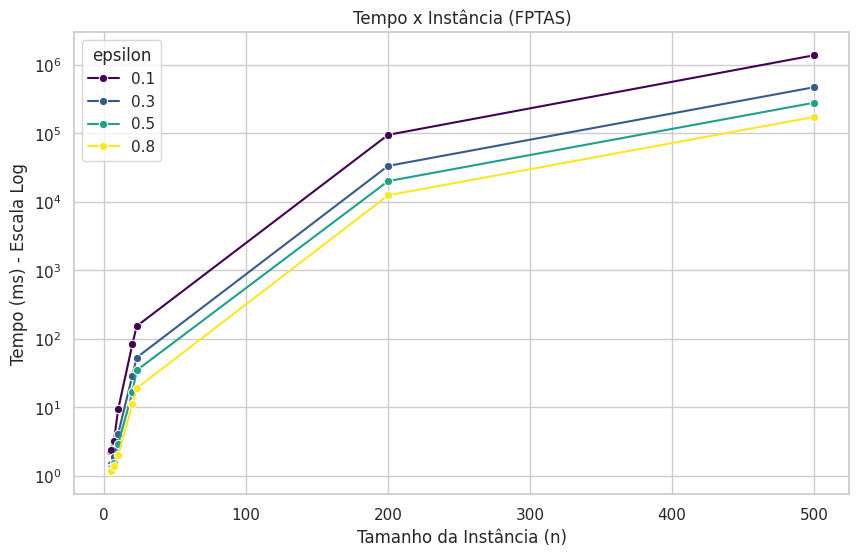

In [ ]:
# --- 3. Tempo vs Instância (FPTAS) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_fptas, x='n', y='time_ms', hue='epsilon', palette='viridis', marker='o', ax=ax)
ax.set(yscale='log', title='Tempo x Instância (FPTAS)', xlabel='Tamanho da Instância (n)', ylabel='Tempo (ms) - Escala Log')
salvar_e_mostrar(fig, "tempo_vs_instancia_fptas")

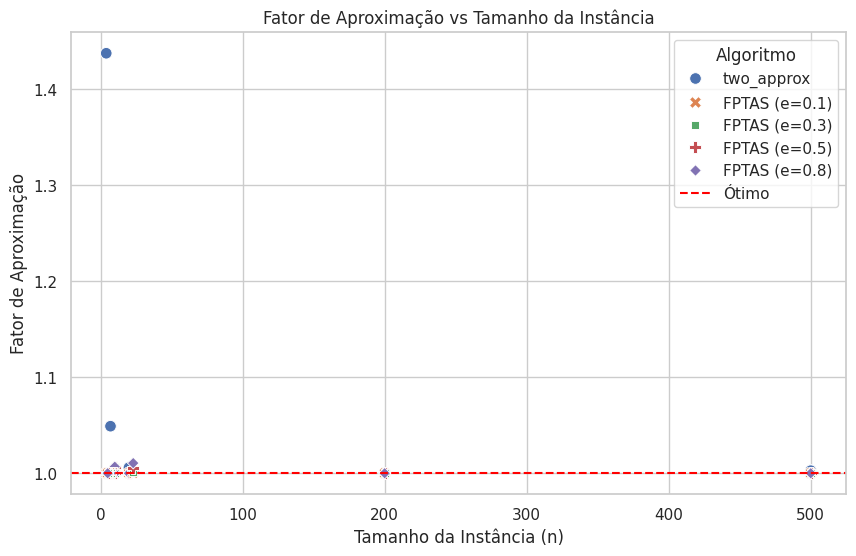

In [ ]:
# --- 4. Fator de Aproximação (FPTAS vs 2-Approx) ---
df_approx = df[df['algorithm'].isin(['two_approx', 'fptas'])]
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_approx, x='n', y='approx_ratio', hue='alg_name', style='alg_name', s=70, ax=ax)
ax.axhline(1.0, color='red', linestyle='--', lw=1.5, label='Ótimo')
ax.set(title='Fator de Aproximação vs Tamanho da Instância', xlabel='Tamanho da Instância (n)', ylabel='Fator de Aproximação')
ax.legend(title='Algoritmo')
salvar_e_mostrar(fig, "fator_aproximacao_comparacao")

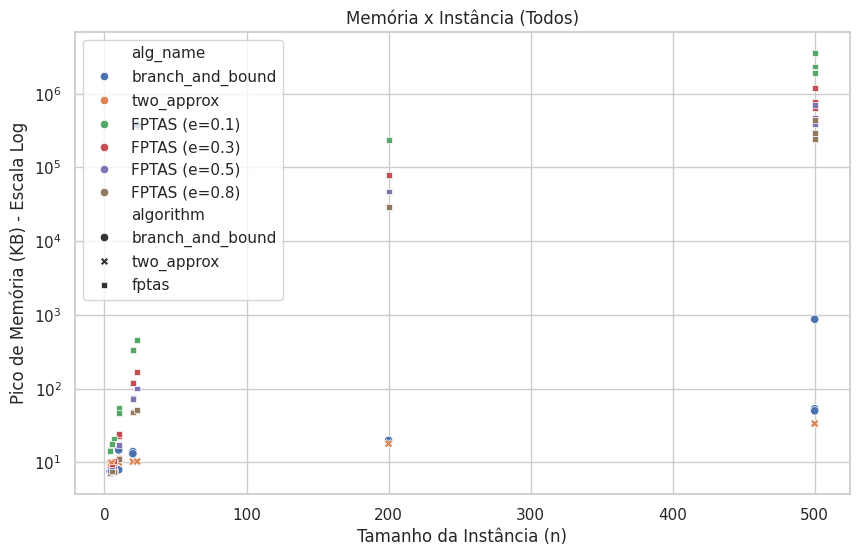

In [ ]:
# --- 5. Memória x Instância (Todos) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='n', y='peak_mem_kb', hue='alg_name', style='algorithm', ax=ax)
ax.set(yscale='log', title='Memória x Instância (Todos)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB) - Escala Log')
salvar_e_mostrar(fig, "memoria_vs_instancia_comparativo")

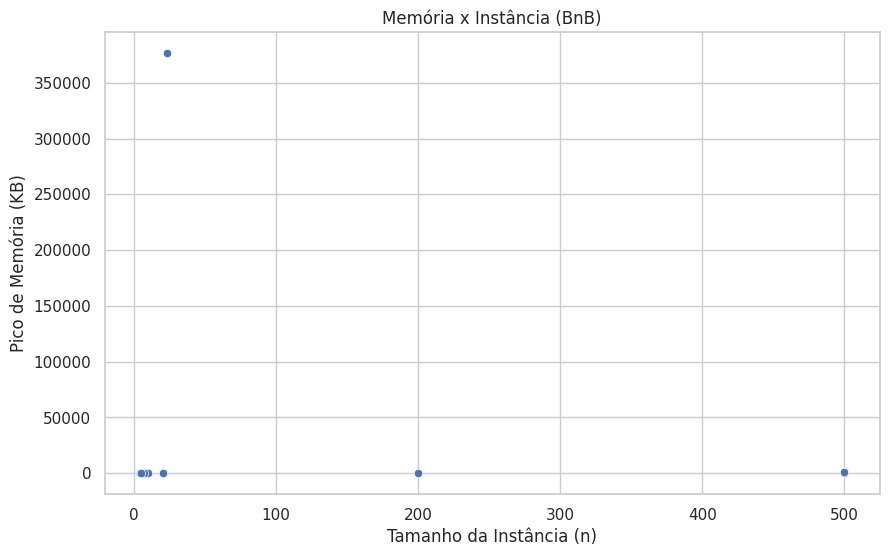

In [ ]:
# --- 6. Memória x Instância (BnB) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_bnb, x='n', y='peak_mem_kb', ax=ax)
ax.set(title='Memória x Instância (BnB)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB)')
salvar_e_mostrar(fig, "memoria_vs_instancia_bnb")

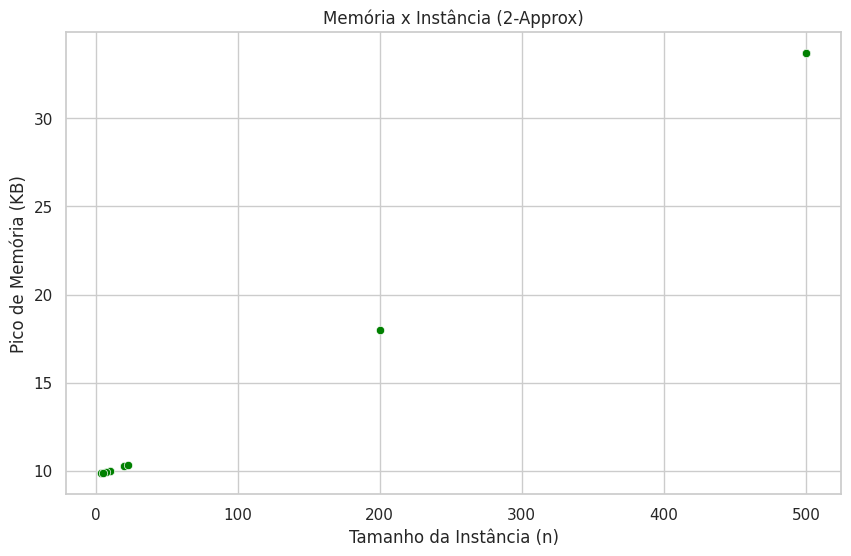

In [ ]:
# --- 7. Memória x Instância (2-Approx) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_2approx, x='n', y='peak_mem_kb', color='green', ax=ax)
ax.set(title='Memória x Instância (2-Approx)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB)')
salvar_e_mostrar(fig, "memoria_vs_instancia_2approx")

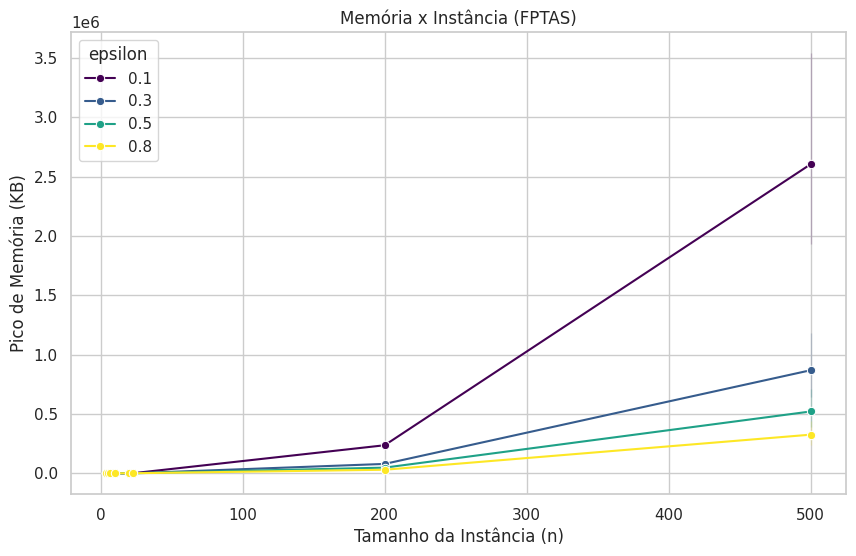

In [ ]:
# --- 8. Memória x Instância (FPTAS) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_fptas, x='n', y='peak_mem_kb', hue='epsilon', palette='viridis', marker='o', ax=ax)
ax.set(title='Memória x Instância (FPTAS)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB)')
salvar_e_mostrar(fig, "memoria_vs_instancia_fptas")

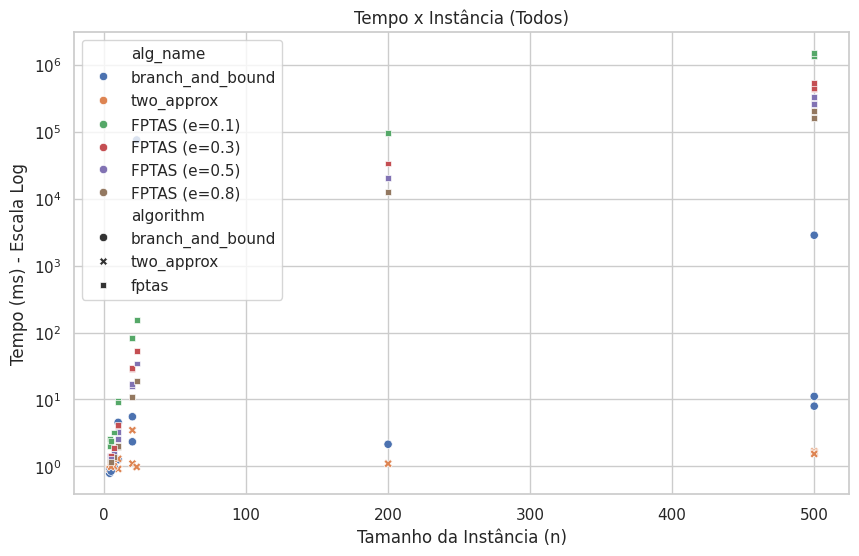

In [ ]:
# --- 9. Tempo x Instância (Todos) ---
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df, x='n', y='time_ms', hue='alg_name', style='algorithm', ax=ax)
ax.set(yscale='log', title='Tempo x Instância (Todos)', xlabel='Tamanho da Instância (n)', ylabel='Tempo (ms) - Escala Log')
salvar_e_mostrar(fig, "tempo_vs_instancia_todos")

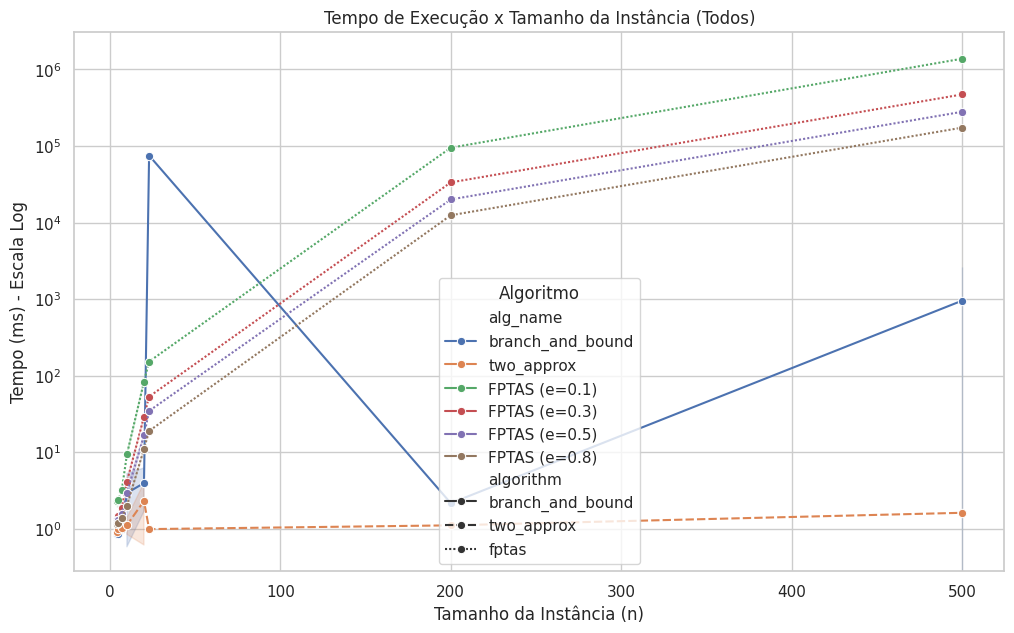

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df, x='n', y='time_ms', hue='alg_name', style='algorithm',
             estimator='mean', ci='sd', errorbar='sd', marker='o', ax=ax)
ax.set(yscale='log')
ax.set(title='Tempo de Execução x Tamanho da Instância (Todos)', xlabel='Tamanho da Instância (n)', ylabel='Tempo (ms) - Escala Log')
ax.legend(title='Algoritmo')
salvar_e_mostrar(fig, "tempo_vs_instancia_todos_melhorado")


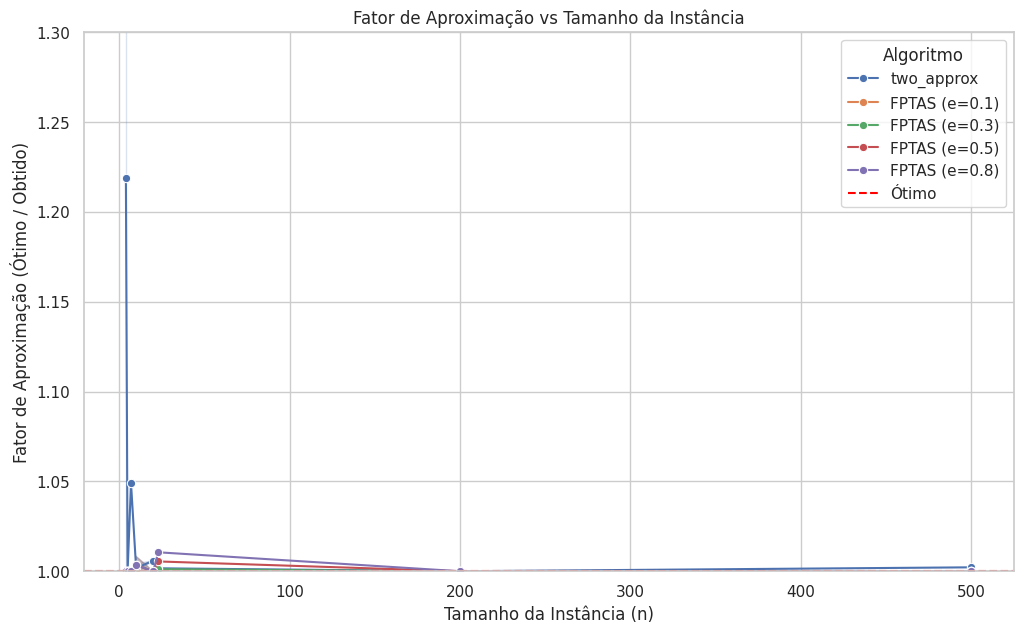

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_approx, x='n', y='approx_ratio', hue='alg_name',
             estimator='mean', errorbar='sd', marker='o', ax=ax)
ax.axhline(1.0, color='red', linestyle='--', label='Ótimo')
ax.set(ylim=(1.0, 1.3))
ax.set(title='Fator de Aproximação vs Tamanho da Instância', xlabel='Tamanho da Instância (n)', ylabel='Fator de Aproximação (Ótimo / Obtido)')
ax.legend(title='Algoritmo')
salvar_e_mostrar(fig, "fator_aproximacao_comparacao_melhorado")

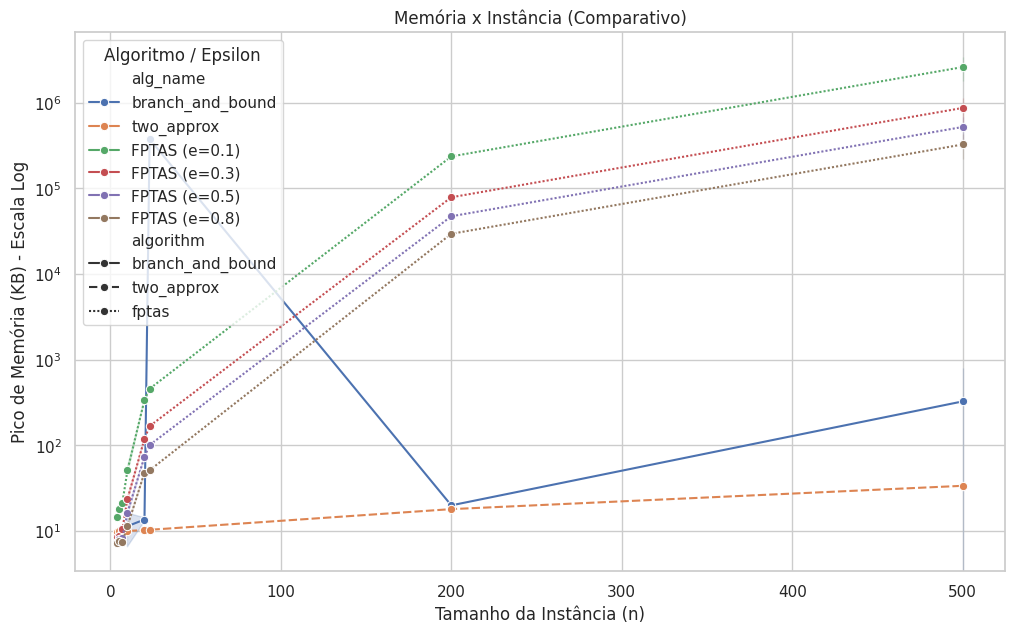

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df, x='n', y='peak_mem_kb', hue='alg_name', style='algorithm',
             estimator='mean', errorbar='sd', marker='o', ax=ax)
ax.set(yscale='log')
ax.set(title='Memória x Instância (Comparativo)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB) - Escala Log')
ax.legend(title='Algoritmo / Epsilon')
salvar_e_mostrar(fig, "memoria_vs_instancia_todos_melhorado")


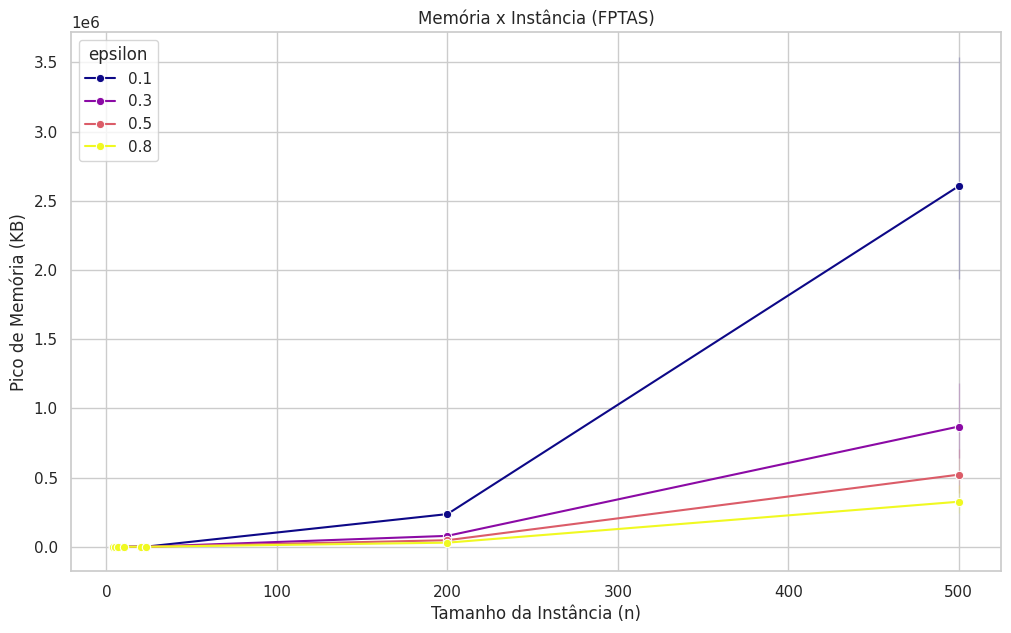

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_fptas, x='n', y='peak_mem_kb', hue='epsilon', palette='plasma', marker='o', ax=ax)
ax.set(title='Memória x Instância (FPTAS)', xlabel='Tamanho da Instância (n)', ylabel='Pico de Memória (KB)')
salvar_e_mostrar(fig, "memoria_vs_instancia_fptas_melhorado")


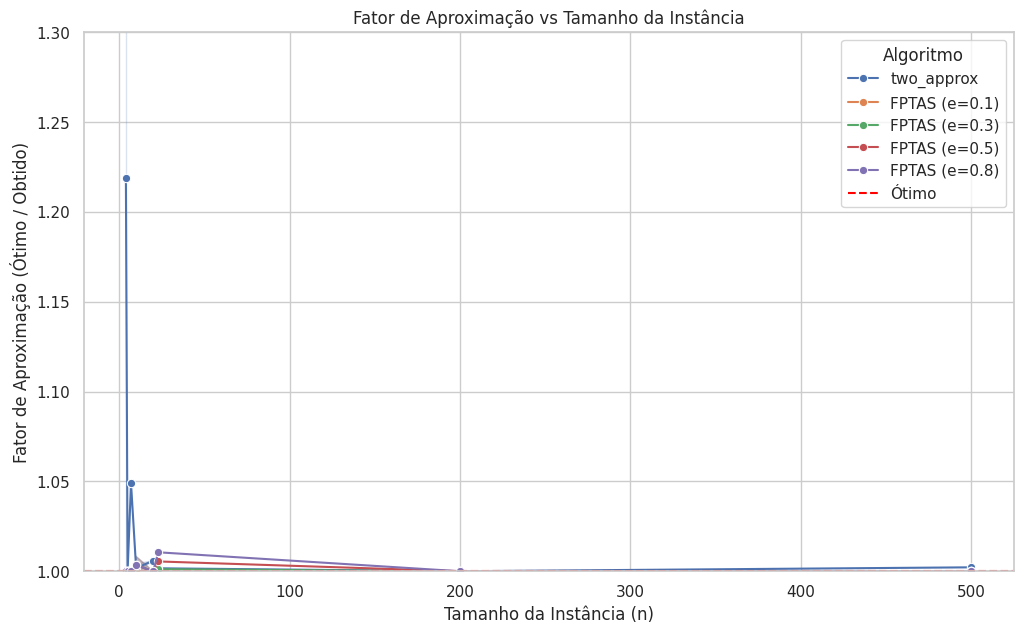

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_approx, x='n', y='approx_ratio', hue='alg_name',
             estimator='mean', errorbar='sd', marker='o', ax=ax)
ax.axhline(1.0, color='red', linestyle='--', label='Ótimo')
ax.set(title='Fator de Aproximação vs Tamanho da Instância', xlabel='Tamanho da Instância (n)', ylabel='Fator de Aproximação (Ótimo / Obtido)')
ax.set_ylim(1.0, 1.3)

# Marcar manualmente os outliers (por exemplo, valores > 1.2)
outliers = df_approx[(df_approx['approx_ratio'] > 1.2)]
for _, row in outliers.iterrows():
    ax.annotate("Outlier", (row['n'], row['approx_ratio']), textcoords="offset points", xytext=(0,10), ha='center', color='red')

ax.legend(title='Algoritmo')
salvar_e_mostrar(fig, "fator_aproximacao_comparacao_outlier_marcado")

In [ ]:
df_approx_filtrado = df_approx[df_approx['approx_ratio'] <= 1.2]

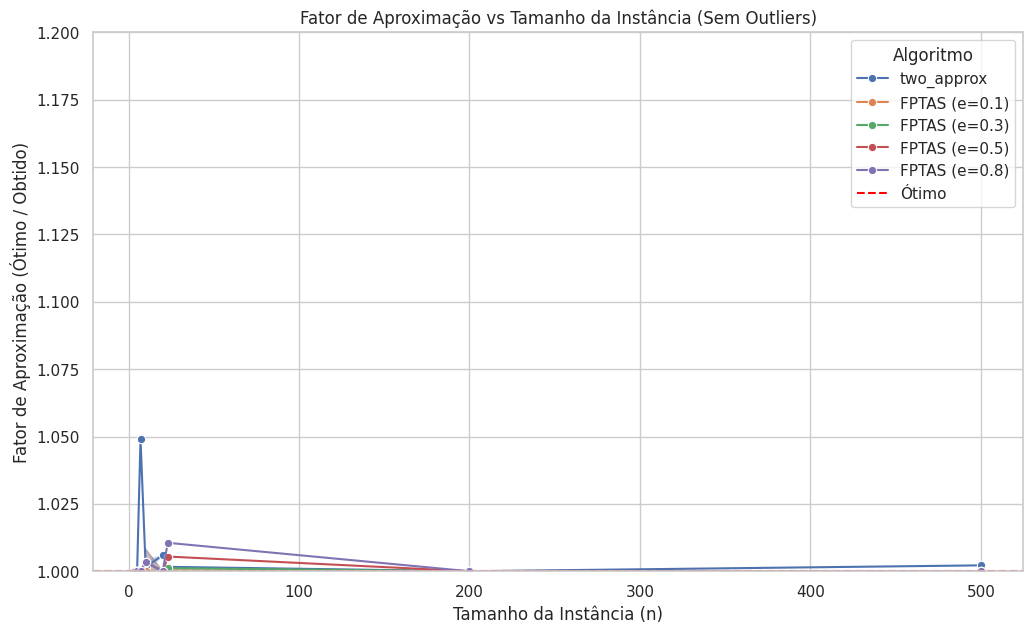

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_approx_filtrado, x='n', y='approx_ratio', hue='alg_name',
             estimator='mean', errorbar='sd', marker='o', ax=ax)
ax.axhline(1.0, color='red', linestyle='--', label='Ótimo')
ax.set(title='Fator de Aproximação vs Tamanho da Instância (Sem Outliers)', xlabel='Tamanho da Instância (n)', ylabel='Fator de Aproximação (Ótimo / Obtido)')
ax.set_ylim(1.0, 1.2)
ax.legend(title='Algoritmo')
salvar_e_mostrar(fig, "fator_aproximacao_sem_outliers")